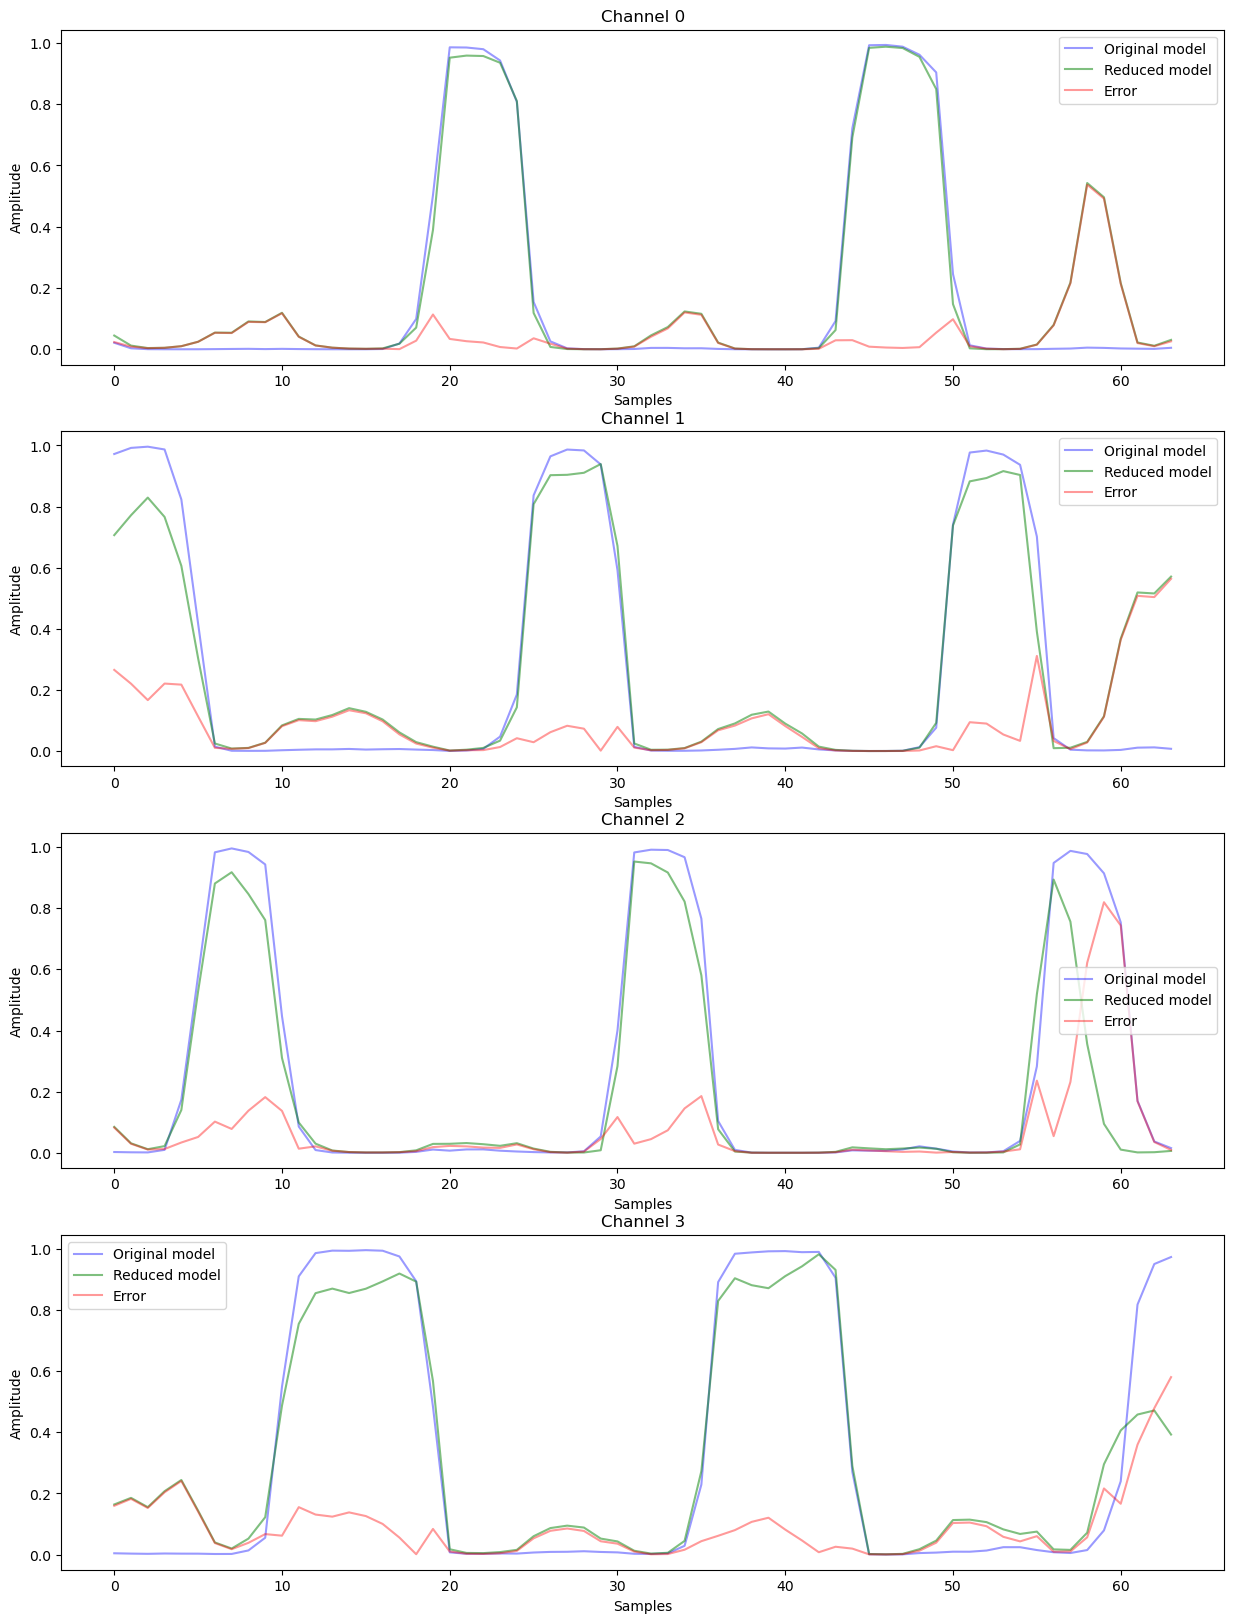

In [13]:
import numpy as np
from tensorflow.keras import layers, Input, Model
import tensorflow as tf
import models_2_reduced as m2
import matplotlib.pyplot as plt
import models as m
import os

os.chdir('/home/domenico/Desktop/Unipv/Magistrale/Thesis/PCG-CNN/Python code') 

# Load the weigths in parameters_v2
model_1 = m.get_model()
model_1.load_weights('parameters.h5')

model_2 = m2.get_model()
os.chdir("../parameters")

# Iterate over network layers and print the name 
for layer in model_2.layers:    
    # Input, Maxpool and Softmax layers do not contain weights
    if 'input' in layer.name or 'maxpool' in layer.name or 'central_conv_relu_1' in layer.name or 'softmax' in layer.name or layer.name == 'dec_0_upsample' or layer.name == 'dec_1_upsample' or layer.name == 'dec_2_upsample' or layer.name == 'dec_3_upsample' or 'concatenate' in layer.name :
        pass
    else: 
        # Set the weights of the layer 
        layer.set_weights([np.load(layer.name + '.npy')])

os.chdir("./inputs/")
X_0 = np.load('X_0.npy')
X_0_0 = X_0[0, :, :]
X_0_0 = np.reshape(X_0_0 , (1, 64, 4))
X_0_0 = tf.convert_to_tensor(X_0_0, dtype=tf.float32)

output_1 = model_1(X_0_0)
output_2 = model_2(X_0_0)
err = abs(output_1 - output_2)

fig, axs = plt.subplots(4, 1, figsize=(15, 20))
for i in range(4):
    axs[i].plot(output_1[0, :, i], c='blue', alpha=0.4)
    axs[i].plot(output_2[0, :, i], c='green', alpha=0.5)
    axs[i].plot(err[0, :, i], c='red', alpha=0.4)
    axs[i].set_title(f'Channel {i}')
    axs[i].set_xlabel('Samples')
    axs[i].set_ylabel('Amplitude')
    axs[i].legend(['Original model', 'Reduced model', 'Error'])
plt.show()

In [1]:
import numpy as np
from tensorflow.keras import layers, Input, Model
import tensorflow as tf
import models_2_reduced as m2
import matplotlib.pyplot as plt
import models as m
import os

os.chdir('/home/domenico/Desktop/Unipv/Magistrale/Thesis/PCG-CNN/Python code') 

model_2 = m2.get_model()
os.chdir("../parameters")

# Iterate over network layers and print the name 
for layer in model_2.layers:    
    # Input, Maxpool and Softmax layers do not contain weights
    if 'input' in layer.name or 'maxpool' in layer.name or 'central_conv_relu_1' in layer.name or 'softmax' in layer.name or layer.name == 'dec_0_upsample' or layer.name == 'dec_1_upsample' or layer.name == 'dec_2_upsample' or layer.name == 'dec_3_upsample' or 'concatenate' in layer.name :
        pass
    else: 
        # Set the weights of the layer 
        layer.set_weights([np.load(layer.name + '.npy')])

os.chdir("./inputs/")
X_0 = np.load('X_0.npy')
X_0_0 = X_0[0, :, :]
X_0_0 = np.reshape(X_0_0 , (1, 64, 4))
X_0_0 = tf.convert_to_tensor(X_0_0, dtype=tf.float32)

output_2 = model_2(X_0_0)
os.chdir('/home/domenico/Desktop/Unipv/Magistrale/Thesis/PCG-CNN/Python code') 
np.savetxt('python_result.txt', (output_2[0, :, :]).numpy(),fmt='%f')

2023-03-29 18:32:15.778183: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-29 18:32:17.566104: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-29 18:32:17.566256: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-29 18:32:17.566272: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv